In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
diamonds = sns.load_dataset('diamonds')
diamonds.shape

(53940, 10)

In [4]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamonds = diamonds.sample(n=200, random_state=44)
diamonds.shape

(200, 10)

## **Intro visuals**

### Basic

In [6]:
sns.set_style('dark')

<Axes: xlabel='carat', ylabel='price'>

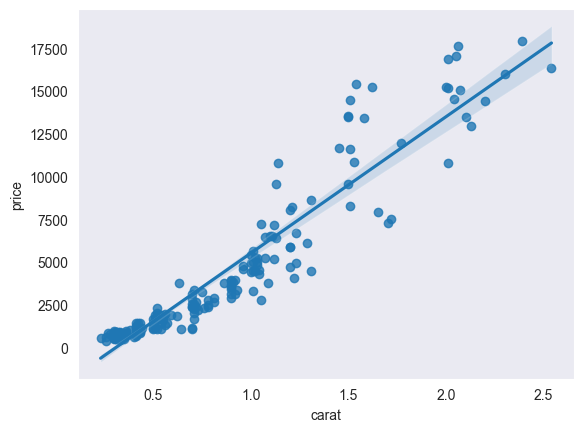

In [7]:
# Pass in two pandas series
# output is a scatterplot and a linear regression line fit onto the data
sns.regplot(x='carat',y='price', data=diamonds)

<Axes: xlabel='carat', ylabel='price'>

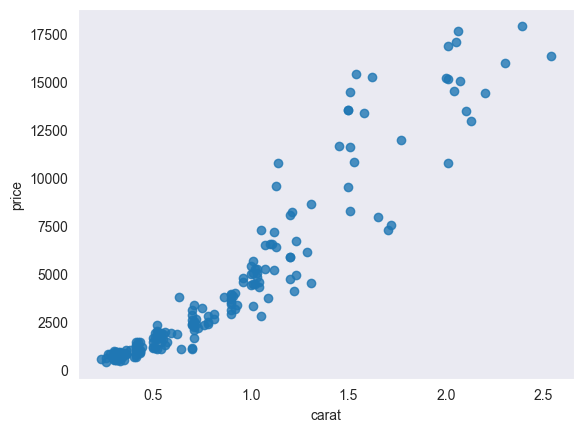

In [8]:
# you can turn off either scatterplot or linear regression line
sns.regplot(x='carat',y='price', data=diamonds, fit_reg=False)

<Axes: xlabel='carat', ylabel='price'>

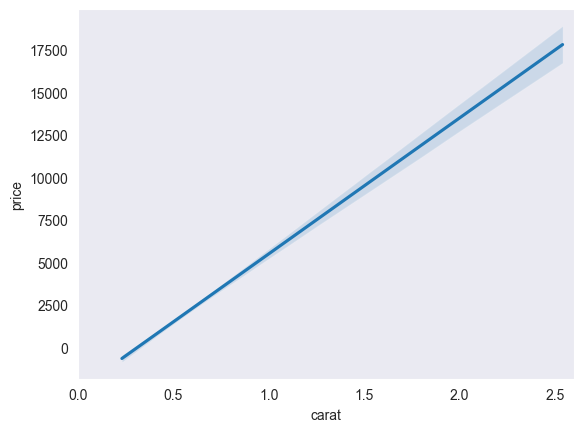

In [9]:
# get current axis, set xlimit
plt.gca().set(xlim=(0,2.6))
sns.regplot(x='carat',y='price', data=diamonds, scatter=False)
# linear regression model is looking for relationship trends between your x and y variable
# The shading are confidence intervals, seaborn uses bootstrapping to create these

## regplot options

### Confidence intervals

<Axes: xlabel='carat', ylabel='price'>

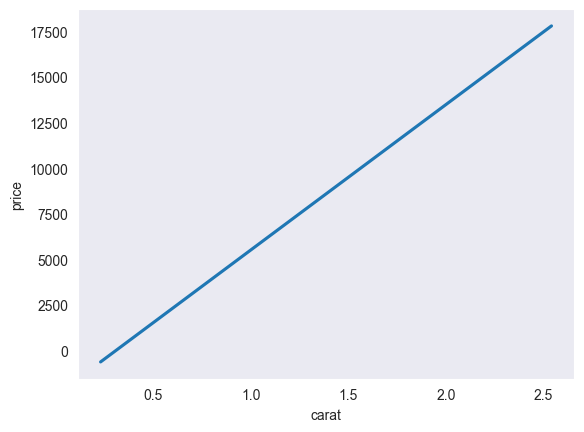

In [10]:
# You can turn off CI
sns.regplot(x='carat',y='price', data=diamonds, scatter=False, ci=None)

In [12]:
# If you have a discrete variable that you want to use for one of the axis
cut_map = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

diamonds['cut_value'] = diamonds.cut.map(cut_map)

In [13]:
diamonds.cut_value.value_counts()

cut_value
5    80
4    63
3    39
2    11
1     7
Name: count, dtype: int64

<Axes: xlabel='cut_value', ylabel='price'>

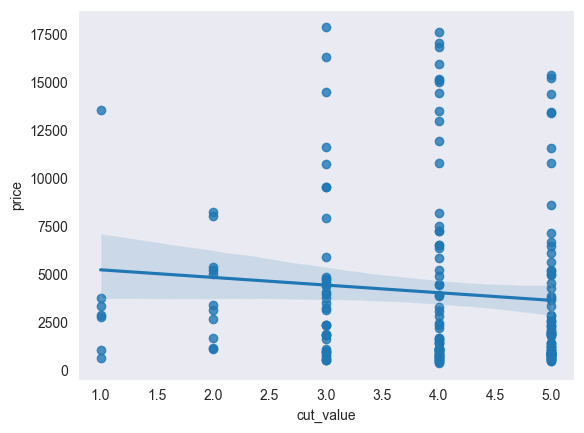

In [29]:
diamonds['cut_value'] = diamonds['cut_value'].astype('category').cat.as_ordered()
sns.regplot(x='cut_value', y='price', data=diamonds)

<Axes: xlabel='cut_value', ylabel='price'>

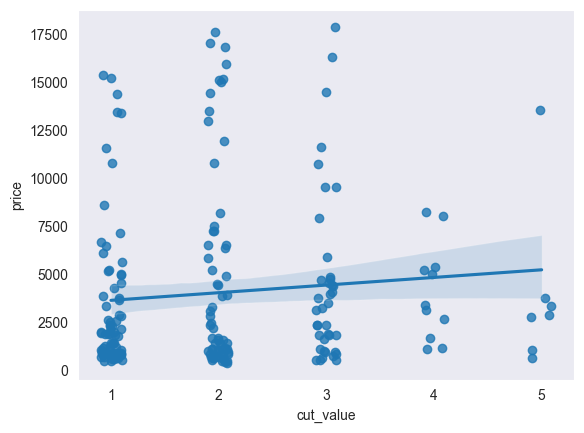

In [35]:
# A lot of the scatter points are stacking on top of each other
cut_map = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}
diamonds['cut_value'] = diamonds['cut_value'].astype('category').cat.codes + 1
sns.regplot(x='cut_value', y='price', data=diamonds, x_jitter=0.1)

### Estimator Aggregate

In [36]:
import numpy as np

<Axes: xlabel='cut_value', ylabel='price'>

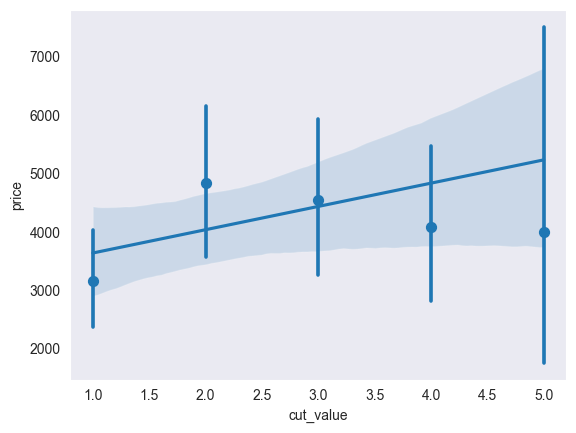

In [37]:
sns.regplot(x='cut_value', y='price', data=diamonds, x_estimator = np.mean)

## Models

### Polynomial Regression (order)

<Axes: xlabel='carat', ylabel='price'>

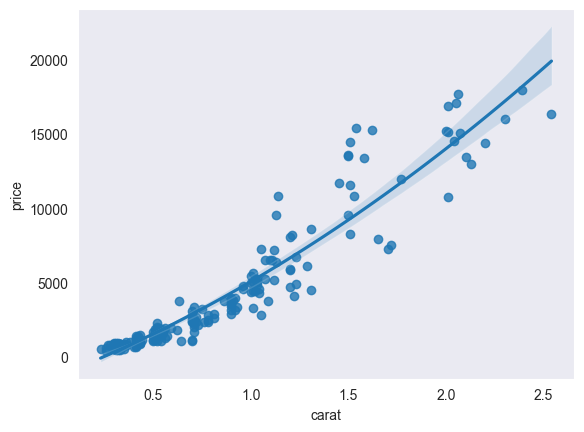

In [40]:
# this data does not look linear so instead of basic linear line, I can increase order of polynomial
sns.regplot(x='carat', y='price', data=diamonds, order=2)

### Robust regression

In [41]:
x_example=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
y_example=[0.1, 0.8, 2.2, 2.7, 3.8, 4.5, 6.2, 6.8, 7.9, 9.4, 30.4]

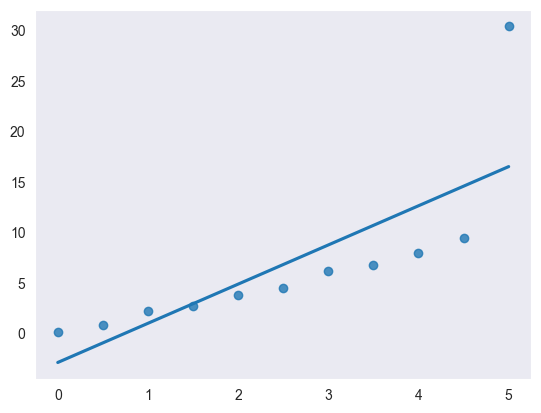

In [44]:
sns.regplot(x=x_example, 
            y=y_example,
            ci=None
            );

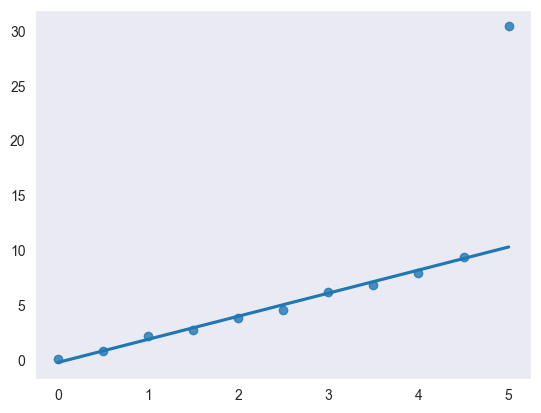

In [46]:
# Data above has a single outlier, can make regression more robust to outliers
# Robust regression plots to the majority of the data as opposed to plotting toward the outlier
sns.regplot(x=x_example, 
            y=y_example,
            ci=None,
            robust=True
            );

## Styling

In [47]:
sns.set_style('white')

### marker

<Axes: xlabel='carat', ylabel='price'>

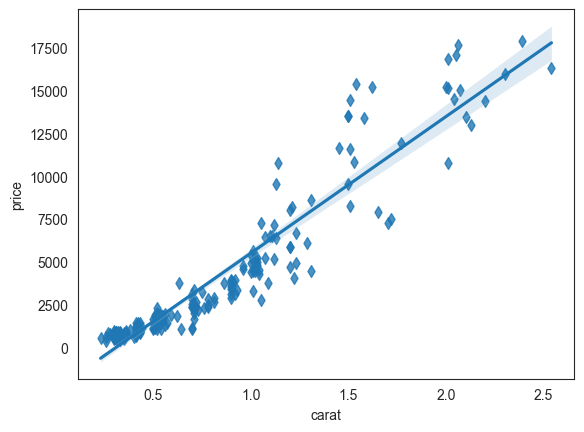

In [49]:
sns.regplot(x='carat',y='price',data=diamonds, marker='d')

### scatter_kws

<Axes: xlabel='carat', ylabel='price'>

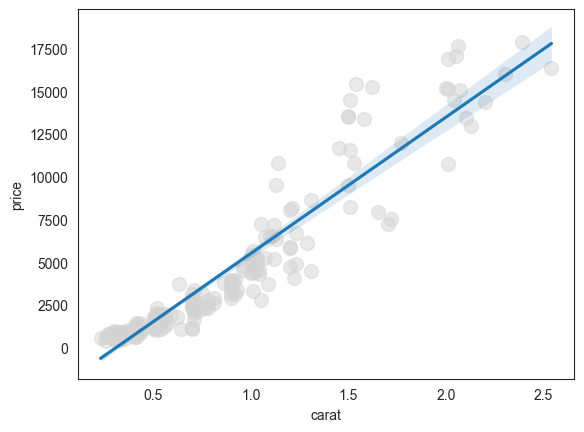

In [53]:
sns.regplot(x='carat',y='price',data=diamonds, scatter_kws={'s':100,'alpha':0.5,'color':'lightgray'})

### line_kws

<Axes: xlabel='carat', ylabel='price'>

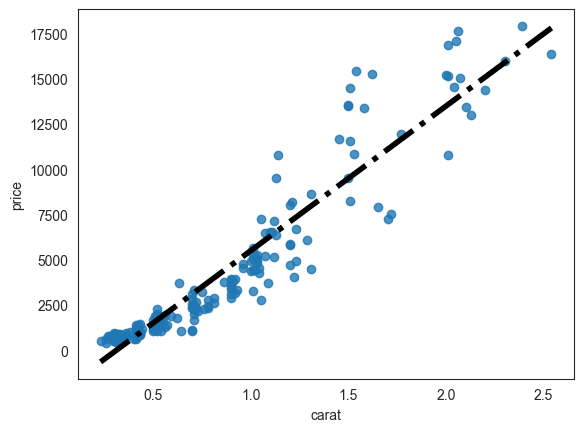

In [57]:
# Anything you know to style a line in matplotlib should work here
sns.regplot(x='carat',y='price',data=diamonds, ci=None, line_kws={'lw':4,'color':'black','linestyle':'-.'})